# Data Mining ACW - Risk Classification

### Imports

Libraries are imported here, key libraries include Pandas for data frames and seaborn for visualisation

In [109]:
import pandas as pd # pip install --user pandas
import matplotlib.pyplot as plt
import seaborn as sns #pip install --user seaborn
from sklearn import preprocessing #pip install --user sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree as tree

# Data Prepration

## Data Cleaning

##### Import data

In [2]:
MedicalRecords = pd.read_csv("600092_data.csv").copy() # Importing csv
MedicalRecordsWorkingCopy = MedicalRecords.copy()

MedicalRecordsWorkingCopy.head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


##### Check for Null Values

Null values are dropped as the percentage of the data that they affect are very low and if this data is imputed it may affect the accuracy of the data models later on in the modeling stage. In this stage some inconsistencies with medical terms affected the data integrity so have been merged.

Find all values and compare against data description

In [3]:
print("Values of Random are:",MedicalRecordsWorkingCopy['Random'].unique(),"\n")
print("Values of Id are:",MedicalRecordsWorkingCopy['Id'].unique(),"\n")
print("Values of Indication are:",MedicalRecordsWorkingCopy['Indication'].unique(),"\n")
print("Values of IHD are:",MedicalRecordsWorkingCopy['IHD'].unique(),"\n")
print("Values of Arrhythmia are:",MedicalRecordsWorkingCopy['Arrhythmia'].unique(),"\n")
print("Values of History are:",MedicalRecordsWorkingCopy['History'].unique(),"\n")
print("Values of IPSI are:",MedicalRecordsWorkingCopy['IPSI'].unique(),"\n")
print("Values of Contra are:",MedicalRecordsWorkingCopy['Contra'].unique(),"\n")
print("Values of label are:",MedicalRecordsWorkingCopy['label'].unique(),"\n")

Values of Random are: [0.60243709 0.12815663 0.6768621  ... 0.62037252 0.63934177 0.6349223 ] 

Values of Id are: [218242 159284 106066 ... 101754 263836 254941] 

Values of Indication are: ['A-F' 'TIA' 'CVA' 'ASx' 'Asx' nan] 

Values of IHD are: ['no' 'yes'] 

Values of Arrhythmia are: ['no' 'yes'] 

Values of History are: ['no' 'yes' nan] 

Values of IPSI are: [78. 70. 95. 90. 75. 81. 80. 76. 82. 85. 68. 50. 73. 99. 71. 65. 74. 98.
 97. 60. 67. 79. 77. 84. 55. 35. 51. nan 69. 72.] 

Values of Contra are: ['20 ' '60 ' '40' '85' '95' '100' '50' '50 ' '30 ' '40 ' '80' '25 ' '75 '
 '10 ' '70 ' '15 ' '75' '35 ' '30' '80 ' '55 ' '100 ' '90' '85 ' '79'
 '45 ' '65 ' '90 ' '62' '53' '51 ' '70' '60' '35' '55' '16 ' '73 ' ' '
 '10' '20' '65'] 

Values of label are: ['NoRisk' 'Risk' 'Unknown' nan] 



In [4]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication'].isnull()] #3 Null Values in Indication

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
442,0.648122,261060,NaN,no,yes,yes,no,no,70.0,40,NoRisk
822,0.211760,205845,NaN,no,yes,no,no,no,80.0,100,Risk
1007,0.761219,256076,NaN,no,no,no,yes,yes,99.0,100,Risk


In [5]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Diabetes'].isnull()] #2 Null Values in Diabetes

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
447,0.681744,224257,CVA,NaN,yes,yes,yes,no,90.0,100,Risk
514,0.392130,210861,A-F,NaN,no,yes,no,no,80.0,40,NoRisk


In [6]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Hypertension'].isnull()] # 3 Null values in Hypertension

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
201,0.388790,240232,CVA,yes,no,NaN,yes,no,95.0,90,Risk
590,0.707950,289096,A-F,no,no,NaN,no,no,78.0,30,NoRisk
983,0.319215,158024,TIA,no,no,NaN,no,no,75.0,75,NoRisk


In [7]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['History'].isnull()] #2 Null Values in History

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
337,0.617072,260770,CVA,no,yes,no,no,NaN,85.0,50,NoRisk
784,0.243645,196483,CVA,no,no,yes,yes,NaN,95.0,100,Risk


In [8]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['IPSI'].isnull()] #4 Null values in ISPI

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
620,0.283872,227779,A-F,no,no,no,no,no,NaN,100,Risk
752,0.243518,146415,CVA,no,yes,yes,yes,no,NaN,100,Risk
845,0.920096,104176,CVA,no,no,no,no,no,NaN,20,NoRisk
916,0.004501,281679,A-F,no,no,no,no,no,NaN,50,NoRisk


In [9]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label'].isnull()] #3 Null Values in Label

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
812,0.756938,190671,CVA,no,yes,yes,no,no,76.0,50,NaN
974,0.923418,165432,CVA,no,yes,yes,yes,no,80.0,70,NaN
1418,0.813102,169726,TIA,yes,no,no,no,yes,90.0,50,NaN


Find any Unknown Values as Unknown Values are Essentially the same as Null, the data description provided states there should only be Risk and NoRisk

In [10]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label']=="Unknown"] #2 Values Wrong

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
475,0.298074,173791,ASx,no,yes,yes,no,no,70.0,55,Unknown
523,0.460170,283846,CVA,no,no,yes,yes,no,95.0,100,Unknown


In [11]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Contra'] == " "] #1 Value Wrong

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
453,0.518558,254469,ASx,no,no,yes,no,no,70.0,,NoRisk


20/1520 Identified as Null/Unknown/Blank which is 1.3% of the whole dataset, this is very small dropping these values may be the best option as imputing them may cause the data to be less accurate later on

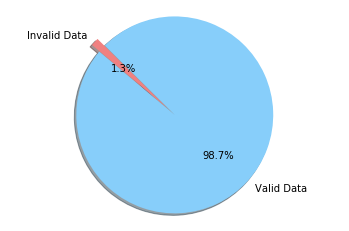

In [12]:
labels = 'Valid Data', 'Invalid Data'
sizes = [1500, 20]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

#### Drop the Records

In [13]:
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Indication"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Diabetes"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["Hypertension"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["History"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["IPSI"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy["label"].isnull()].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['label'] == "Unknown"].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop (MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Contra'] == " "].index ,axis =0)#drop NaNs
MedicalRecordsWorkingCopy.head()


,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


## Data Duplication

There are 2 Versions of ASx one with less records and 1 with more

In [14]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="Asx"].head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
68,0.549947,113727,Asx,yes,yes,yes,no,no,75.0,100,Risk
111,0.171185,95883,Asx,yes,yes,yes,yes,no,99.0,75,Risk
131,0.511954,95004,Asx,no,yes,yes,yes,no,75.0,100,Risk
172,0.209577,84632,Asx,yes,yes,yes,no,no,90.0,95,Risk
177,0.895377,230462,Asx,no,yes,yes,yes,no,80.0,53,Risk


In [15]:
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="ASx"].head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
16,0.065821,275149,ASx,no,yes,yes,yes,no,90.0,100,Risk
19,0.065821,101248,ASx,yes,no,yes,no,no,80.0,80,Risk
21,0.981939,217006,ASx,no,yes,no,no,no,80.0,75,NoRisk
22,0.890427,184827,ASx,no,no,yes,no,no,85.0,10,NoRisk
57,0.723126,254427,ASx,no,yes,no,no,no,76.0,50,NoRisk


According to the medical dictionary (https://medical-dictionary.thefreedictionary.com/Asx) the correct version of this acronym is Asx. 

Change ASx to Asx

In [16]:
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.replace('ASx','Asx')
MedicalRecordsWorkingCopy[MedicalRecordsWorkingCopy['Indication']=="Asx"].head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
16,0.065821,275149,Asx,no,yes,yes,yes,no,90.0,100,Risk
19,0.065821,101248,Asx,yes,no,yes,no,no,80.0,80,Risk
21,0.981939,217006,Asx,no,yes,no,no,no,80.0,75,NoRisk
22,0.890427,184827,Asx,no,no,yes,no,no,85.0,10,NoRisk
57,0.723126,254427,Asx,no,yes,no,no,no,76.0,50,NoRisk


In [17]:
print ("Is Random truley unique to each record:",MedicalRecordsWorkingCopy['Random'].is_unique,"\n")
print ("Is Random Id unique to each record:",MedicalRecordsWorkingCopy['Id'].is_unique)

Is Random truley unique to each record: False 

Is Random Id unique to each record: True


The Data dictionary states that Random is a completly unique value and as seen above the data repeats itself however Id is completley unique. Is the data wrong or the values value names in the wrong order? 

it is highly probable that the value names are the wrong way round and as you can see by the bar chart below you can see how many times a patient visited a hospital if "Random" was "ID". This should have been ironed out in the buiness understanding phase of CRISP-DM however due to not having any contact with the outside buiness I have kept this the same as the Data Description.

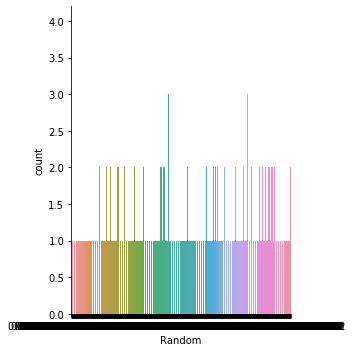

In [18]:
sns.catplot("Random",data = MedicalRecordsWorkingCopy, kind = 'count')

#### Droping Duplicates?

Dropping the duplicates (patients that visited more than once) would drop a significant portion of the data (as seen below) so the datasets accuracy might be severly affected later on in the process. Additionally, considering im only predicting if a Patient is a Risk or not I don't mind having duplicates in my data as this will not affect my end result. 

Number of duplicated records 289


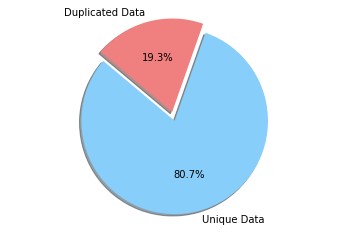

In [19]:
count = 0
DuplicatedNo = MedicalRecordsWorkingCopy['Random'].duplicated()
for x in DuplicatedNo:
    if x == True:
        count = count + 1
        
print("Number of duplicated records",count)


labels = 'Unique Data', 'Duplicated Data'
sizes = [1211, 289]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Check Data Types

Check if the data types line up with the data description given if not change it

In [20]:
MedicalRecordsWorkingCopy.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra           object
label            object
dtype: object

In [21]:
MedicalRecordsWorkingCopy['IPSI'] = MedicalRecordsWorkingCopy['IPSI'].astype(int)


In [22]:
MedicalRecordsWorkingCopy['Contra'] = MedicalRecordsWorkingCopy['Contra'].astype(int)
MedicalRecordsWorkingCopy.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI              int32
Contra            int32
label            object
dtype: object

## Check if data is fully clean

This data should align with the given data description

In [23]:
print("Values of Random are:",MedicalRecordsWorkingCopy['Random'].unique(),"\n")
print("Values of Id are:",MedicalRecordsWorkingCopy['Id'].unique(),"\n")
print("Values of Indication are:",MedicalRecordsWorkingCopy['Indication'].unique(),"\n")
print("Values of IHD are:",MedicalRecordsWorkingCopy['IHD'].unique(),"\n")
print("Values of Arrhythmia are:",MedicalRecordsWorkingCopy['Arrhythmia'].unique(),"\n")
print("Values of History are:",MedicalRecordsWorkingCopy['History'].unique(),"\n")
print("Values of IPSI are:",MedicalRecordsWorkingCopy['IPSI'].unique(),"\n")
print("Values of Contra are:",MedicalRecordsWorkingCopy['Contra'].unique(),"\n")
print("Values of label are:",MedicalRecordsWorkingCopy['label'].unique(),"\n")

Values of Random are: [0.60243709 0.12815663 0.6768621  ... 0.62037252 0.63934177 0.6349223 ] 

Values of Id are: [218242 159284 106066 ... 101754 263836 254941] 

Values of Indication are: ['A-F' 'TIA' 'CVA' 'Asx'] 

Values of IHD are: ['no' 'yes'] 

Values of Arrhythmia are: ['no' 'yes'] 

Values of History are: ['no' 'yes'] 

Values of IPSI are: [78 70 95 90 75 81 80 76 82 85 68 50 73 99 71 65 74 98 97 60 67 79 77 84
 55 35 51 69 72] 

Values of Contra are: [ 20  60  40  85  95 100  50  30  80  25  75  10  70  15  35  55  90  79
  45  65  62  53  51  16  73] 

Values of label are: ['NoRisk' 'Risk'] 



## What Values are needed for the classification?

Most values in this data set are needed for the classification as they have meaning and could affect the outcome. However, Id and Random doesn'yt actually matter as knowing who someone is doesnt affect the end result, for that reason I have dropped these 2 columbs

In [24]:
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop(columns=['Id','Random'])
MedicalRecordsWorkingCopy.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,A-F,no,no,yes,no,no,78,20,NoRisk
1,TIA,no,no,no,no,no,70,60,NoRisk
2,A-F,no,yes,yes,no,no,95,40,Risk
3,TIA,no,no,yes,no,no,90,85,Risk
4,CVA,no,no,no,no,no,70,20,NoRisk


Split the Indication values into 4 columbs to allow for correlations between the conditions

In [25]:
dummiesIndication = MedicalRecordsWorkingCopy["Indication"].str.get_dummies(" ")
MedicalRecordsWorkingCopy = MedicalRecordsWorkingCopy.drop(columns=['Indication'])
frames = [MedicalRecordsWorkingCopy,dummiesIndication] #data to concatanate
MedicalRecordsWorkingCopy = pd.concat(frames, axis=1) #concated data

## Finding Correlations

Finding Correlations in the data is important as it shows where one data varible (IPSI,Contra,Diabetes..etc) may affect another varible in the data. This is important for this data as knowing what data affects someone who is at risk is key to predicting is someone new has a risk or not. 


Values need to be numbers in order to find the correlation values of the data, therefore a copy of the data has been made and some values have been replaces by dummies. Label encoder from sklearn was used as it was easier to set all of the values to binary digits, Get_dummies was used when I wanted to split the values into two seperate colunmbs 

In [26]:
MedicalRecordsDummies = MedicalRecordsWorkingCopy.copy()
MedicalRecordsDummies.head()

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label,A-F,Asx,CVA,TIA
0,no,no,yes,no,no,78,20,NoRisk,1,0,0,0
1,no,no,no,no,no,70,60,NoRisk,0,0,0,1
2,no,yes,yes,no,no,95,40,Risk,1,0,0,0
3,no,no,yes,no,no,90,85,Risk,0,0,0,1
4,no,no,no,no,no,70,20,NoRisk,0,0,1,0


In [27]:
dummiesLabel = MedicalRecordsDummies["label"].str.get_dummies(" ")
MedicalRecordsDummies = MedicalRecordsDummies.drop(columns=['label'])
frames = [MedicalRecordsDummies,dummiesLabel] #data to concatanate
MedicalRecordsDummies = pd.concat(frames, axis=1) #concated data

In [28]:
le = preprocessing.LabelEncoder() #create label encoder object to use on data

MedicalRecordsDummies['Diabetes'] = le.fit_transform(MedicalRecordsDummies['Diabetes'])
MedicalRecordsDummies['IHD'] = le.fit_transform(MedicalRecordsDummies['IHD'])
MedicalRecordsDummies['Hypertension'] = le.fit_transform(MedicalRecordsDummies['Hypertension'])
MedicalRecordsDummies['Arrhythmia'] = le.fit_transform(MedicalRecordsDummies['Arrhythmia'])
MedicalRecordsDummies['History'] = le.fit_transform(MedicalRecordsDummies['History'])
MedicalRecordsDummies.head()

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,A-F,Asx,CVA,TIA,NoRisk,Risk
0,0,0,1,0,0,78,20,1,0,0,0,1,0
1,0,0,0,0,0,70,60,0,0,0,1,1,0
2,0,1,1,0,0,95,40,1,0,0,0,0,1
3,0,0,1,0,0,90,85,0,0,0,1,0,1
4,0,0,0,0,0,70,20,0,0,1,0,1,0


In [29]:
MedicalRecordsCorr = MedicalRecordsDummies.corr()
MedicalRecordsCorr

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,A-F,Asx,CVA,TIA,NoRisk,Risk
Diabetes,1.000000,0.064017,0.164368,0.095624,-0.002545,0.158694,0.188610,-0.009462,0.036593,-0.050563,0.032132,-0.285510,0.285510
IHD,0.064017,1.000000,0.137069,0.168570,-0.071391,0.090221,0.113951,0.049031,0.017554,-0.002756,-0.063760,-0.252071,0.252071
Hypertension,0.164368,0.137069,1.000000,0.289896,-0.073294,0.089246,0.113192,-0.101607,0.060377,0.080493,-0.021376,-0.387746,0.387746
Arrhythmia,0.095624,0.168570,0.289896,1.000000,0.003544,0.391332,0.496099,0.043948,0.099263,0.128973,-0.257589,-0.706442,0.706442
History,-0.002545,-0.071391,-0.073294,0.003544,1.000000,-0.000118,0.103961,-0.061189,-0.050040,0.000382,0.105230,0.003921,-0.003921
IPSI,0.158694,0.090221,0.089246,0.391332,-0.000118,1.000000,0.317034,0.151534,0.062849,-0.024505,-0.187714,-0.490566,0.490566
Contra,0.188610,0.113951,0.113192,0.496099,0.103961,0.317034,1.000000,-0.001670,0.020183,0.057459,-0.072738,-0.649821,0.649821
A-F,-0.009462,0.049031,-0.101607,0.043948,-0.061189,0.151534,-0.001670,1.000000,-0.285248,-0.424391,-0.410811,-0.117663,0.117663
Asx,0.036593,0.017554,0.060377,0.099263,-0.050040,0.062849,0.020183,-0.285248,1.000000,-0.250283,-0.242275,-0.128898,0.128898
CVA,-0.050563,-0.002756,0.080493,0.128973,0.000382,-0.024505,0.057459,-0.424391,-0.250283,1.000000,-0.360455,0.018023,-0.018023


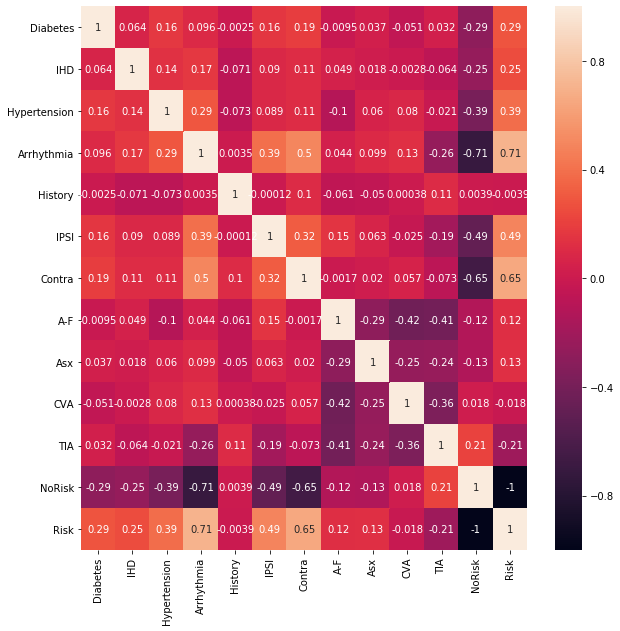

In [30]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(MedicalRecordsCorr,annot=True)

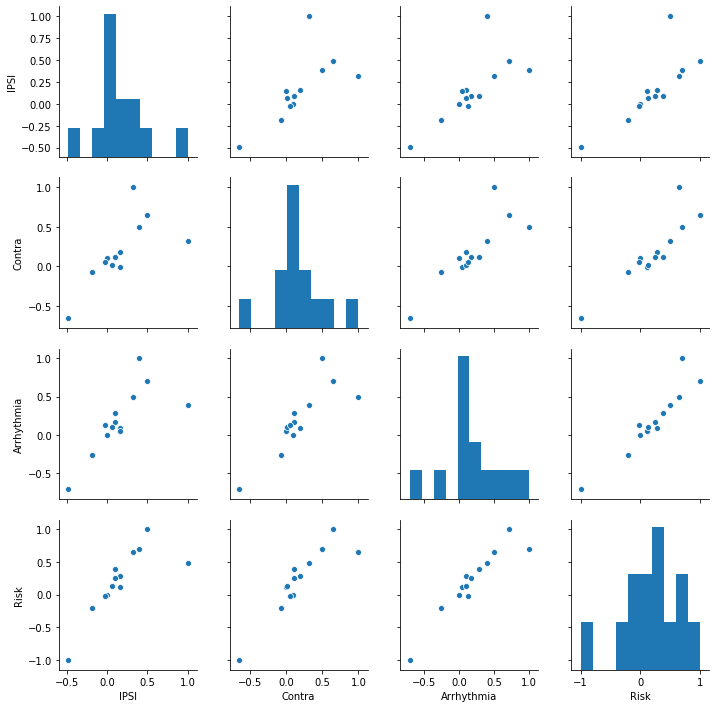

In [31]:
sns.pairplot(MedicalRecordsCorr,vars = ['IPSI','Contra','Arrhythmia','Risk'] )


There seems to be correlations between the following

Contra - Risk (Strong Correlation)

IPSI - Risk (Strong Correlation)

Arrhythmia - Risk (Very Strong Correlation)


#### Visulise the Correlations

The plot below seems to support the correlation between IPSI and Risk, as as the IPSI number increases the chance you are a risk also increases. This is by no means a certain stat as some at 99 IPSI are not a risk. 

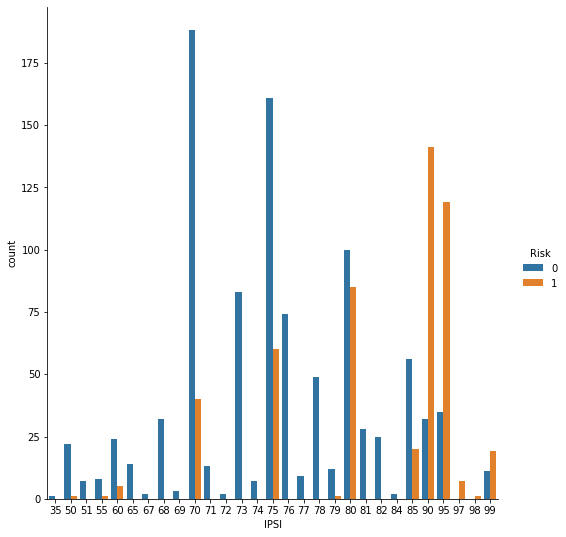

In [32]:
RiskVsIPSICorr = sns.catplot("IPSI",data = MedicalRecordsDummies, kind = 'count', hue = 'Risk')
RiskVsIPSICorr.fig.set_size_inches(8,8)

The plot below seems to support the correlation between Contra and Risk, as as the Contra number increases the chance you are a risk also increases. This correlation is particularly strong as when someone has 100% they have a very high chance of being a risk.

As with the IPSI and Risk this is by no means certain as there are people that have 100% contra but are not at Risk


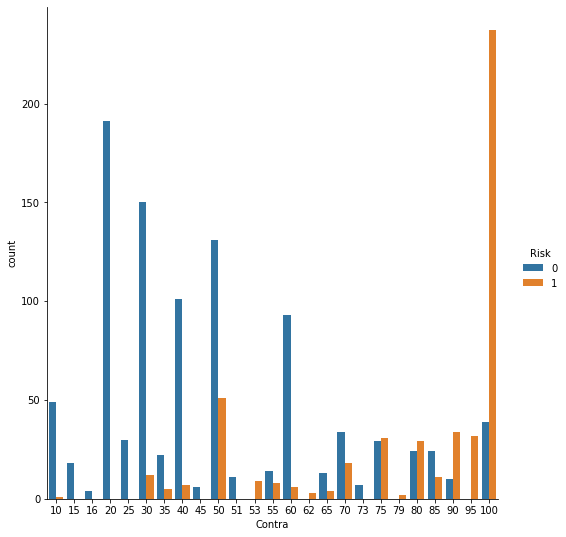

In [33]:
RiskVsContraCorr = sns.catplot("Contra",data = MedicalRecordsDummies, kind = 'count', hue = 'Risk')
RiskVsContraCorr.fig.set_size_inches(8,8)

The plot below seems to support the Very strong correlation between Arrhythmia and Risk, if the patient has Arrhythmia the chance you are a risk significantly increases.

As with the other correlations its not certain as some people have Arrhythmia but are not a risk and people that have it that are not a risk

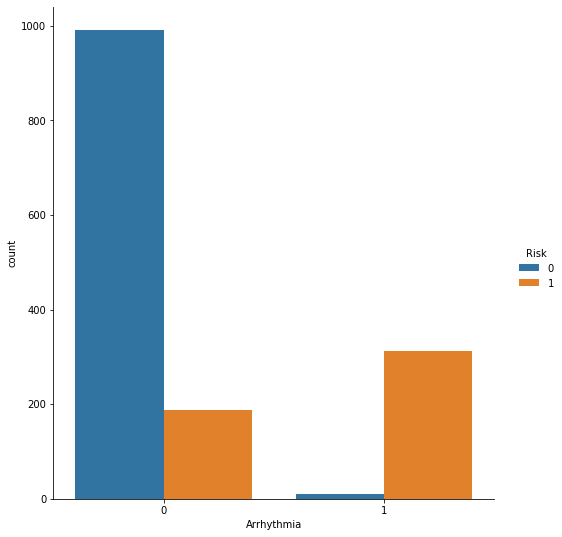

In [34]:
RiskVsArrhythmiaCorr = sns.catplot("Arrhythmia",data = MedicalRecordsDummies, kind = 'count', hue = 'Risk')
RiskVsArrhythmiaCorr.fig.set_size_inches(8,8)

#### Look for any outliers that may be skewing the correlations 

The boxplot below shows the outliers in IPSI, there are only 3 of them which is not large enough to skew the results of the correlation. I am also not going to drop these values as they still could be valid data that can be used to train a model.

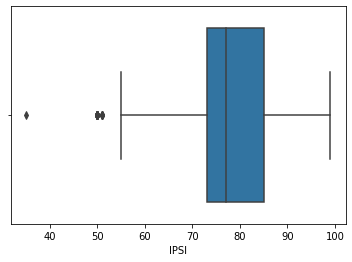

In [35]:
sns.boxplot(x = "IPSI", hue = "Risk", data = MedicalRecordsDummies)

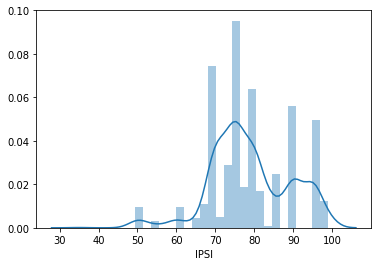

In [36]:
sns.distplot(MedicalRecordsDummies['IPSI'])


The reason there are outliers is probably due to the fact the data is skewed to the higher values which means that the outliers are probably correct values.

Unlike IPSI, Contra has no outliers so any results can not be skewed. This is also reflected by the wide spread of data values in the distplot. 


Additionally, plotting Arrhythmia wouldnt show any outliers as the data was a clean booleon 

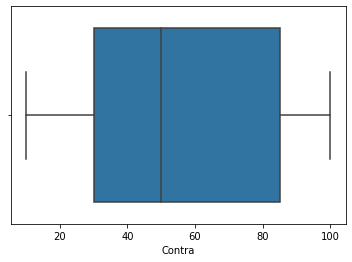

In [37]:
sns.boxplot(x = "Contra", data = MedicalRecordsDummies)

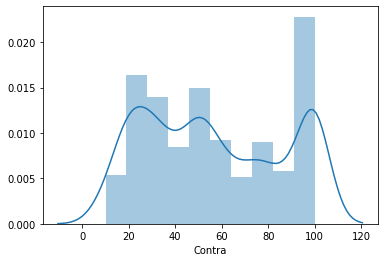

In [38]:
sns.distplot(MedicalRecordsDummies['Contra'])

### Prepare for Modeling

Prepare for modeling by copying the dummies data and dropping the NoRisk columb as having a negative Risk means no Risk

In [48]:
ModelCopy = MedicalRecordsWorkingCopy.copy()

ModelCopy.rename(columns={'label': 'Risk'}, inplace=True)
ModelCopy['Risk'] = le.fit_transform(ModelCopy['Risk'])

ModelCopy['Diabetes'] = le.fit_transform(ModelCopy['Diabetes'])
ModelCopy['IHD'] = le.fit_transform(ModelCopy['IHD'])
ModelCopy['Hypertension'] = le.fit_transform(ModelCopy['Hypertension'])
ModelCopy['Arrhythmia'] = le.fit_transform(ModelCopy['Arrhythmia'])
ModelCopy['History'] = le.fit_transform(ModelCopy['History'])

ModelCopy.head()

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Risk,A-F,Asx,CVA,TIA
0,0,0,1,0,0,78,20,0,1,0,0,0
1,0,0,0,0,0,70,60,0,0,0,0,1
2,0,1,1,0,0,95,40,1,1,0,0,0
3,0,0,1,0,0,90,85,1,0,0,0,1
4,0,0,0,0,0,70,20,0,0,0,1,0


#### Splitting the data

To train a model you require a target dataset (what you are tring to predict) the rest of the data split into two. The first of which is the Risk data I am trying to predict, this has been split from the data set below

In [49]:
MedicalRecordsRisk = ModelCopy[['Risk']]
MedicalRecordsRisk.head()

,Risk
0,0
1,0
2,1
3,1
4,0


The second data set is the rest of the data, I dropped the risk columb as if the model had the risk it couldnt learn what to predict properly. it cannot learn what it already knows. 

In [50]:
ModelCopy = ModelCopy.drop(columns=['Risk'])
ModelCopy.head()

,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,A-F,Asx,CVA,TIA
0,0,0,1,0,0,78,20,1,0,0,0
1,0,0,0,0,0,70,60,0,0,0,1
2,0,1,1,0,0,95,40,1,0,0,0
3,0,0,1,0,0,90,85,0,0,0,1
4,0,0,0,0,0,70,20,0,0,1,0


This data is then split into four sets of data 
x training set (The data without risk for tarining the model)
x test set (The data without the risk for testing the model) 
y training set (the risk data for training the model) 
y test (the risk data for testing the model) 

This is a 70% / 30% split between the Training and Test set, this is to ensure there is enough data to train and enough unseen data to test the model. 

This set is picked randomly from the dataset to ensure there is no bias in the picked data that might cause the model to underfit or overfit. 

In [51]:
xTrain, xTest,yTrain,yTest = train_test_split(ModelCopy,MedicalRecordsRisk, test_size = 0.30, shuffle = True)

Number of records in training set: Risk    1050
dtype: int64
Number of records in training set: Risk    450
dtype: int64


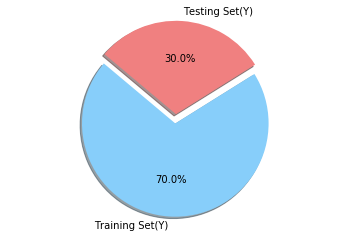

In [52]:
print("Number of records in training set:",yTrain.count())
print("Number of records in training set:", yTest.count())


labels = 'Training Set(Y)', 'Testing Set(Y)'
sizes = [1050, 450]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Number of records in training set: Diabetes        1050
IHD             1050
Hypertension    1050
Arrhythmia      1050
History         1050
IPSI            1050
Contra          1050
A-F             1050
Asx             1050
CVA             1050
TIA             1050
dtype: int64
Number of records in Testing set: Diabetes        450
IHD             450
Hypertension    450
Arrhythmia      450
History         450
IPSI            450
Contra          450
A-F             450
Asx             450
CVA             450
TIA             450
dtype: int64


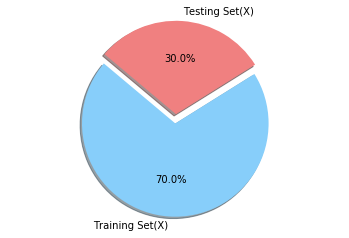

In [104]:
print("Number of records in training set:",xTrain.count())
print("Number of records in Testing set:", xTest.count())


labels = 'Training Set(X)', 'Testing Set(X)'
sizes = [1050, 450]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Modeling

## Linear Regression

In [127]:
LinearRegressionModel = LinearRegression()

In [128]:
RegressionModel = LinearRegressionModel.fit(X=xTrain, y=yTrain)

In [130]:
yPredtestRegression = RegressionModel.predict(xTest)

In [131]:
yPredtestRegression


array([[ 1.75219877e-01],
       [ 1.06548800e+00],
       [ 1.36083735e-01],
       [-1.92210683e-01],
       [ 3.94216284e-01],
       [-1.18678877e-01],
       [ 1.97161801e-01],
       [ 8.85557613e-01],
       [-4.65549341e-02],
       [ 2.62367854e-01],
       [ 5.70972416e-01],
       [ 8.50778004e-01],
       [-1.02687843e-03],
       [ 1.02359020e-01],
       [ 1.30594013e-01],
       [-5.72832859e-02],
       [-1.37677937e-01],
       [-5.00657085e-04],
       [ 4.62964248e-01],
       [ 9.99012773e-01],
       [ 4.98414808e-01],
       [ 8.23077503e-02],
       [ 1.26382955e-02],
       [ 2.82123676e-01],
       [ 1.33533991e-01],
       [-5.72832859e-02],
       [ 3.66405517e-02],
       [ 6.92134057e-01],
       [ 7.22935332e-02],
       [ 3.88548027e-01],
       [ 1.21036697e-01],
       [ 4.72339324e-01],
       [ 1.42662449e+00],
       [ 1.06548800e+00],
       [ 1.26382955e-02],
       [-1.47370539e-01],
       [ 1.56568199e-01],
       [ 6.65008354e-01],
       [ 1.0

In [132]:
df = pd.DataFrame({'Actual': yTest, 'Predicted': yPredtestRegression})
df.head()

ValueError: If using all scalar values, you must pass an index